<a href="https://colab.research.google.com/github/MariaFernandaReyesLopez/CarPrice/blob/main/CarPrice_Actividad3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.2 Regresión lineal CarPrice

* **Nombre del alumno:** Amairani Michel Duran Ibarra, María Fernanda Reyes Lopez y Erick de Jesus Perez Macias.
* **Grupo:** IDGS 91
* **Fecha de entrega:** 31/Octubre/2021

# Realizamos el analisis del Dataset

## Cargamos librerias y el dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df=pd.read_csv("car_price_assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


## Mostramos la forma del dataframe, es decir cuantas filas y columnas tiene

In [ ]:
df.shape

(205, 26)

## Obtenemos los 5 primeros registros, y los 5 ultimos

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


## Vamos a analizar si existen datos nulos

In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## Analizamos los tipos de datos en el dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Obtenemos la media, mediana y moda de las columnas con un tipo de dato numerico,menos el ID.

In [ ]:

cols=["wheelbase","carlength","carwidth",	"carheight","curbweight","enginesize","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg"]

for col in cols:
  print("Columna {}: Mean {}".format(col,df[col].mean()))
  print("Columna {}: Median {}".format(col,df[col].median()))
  print("Columna {}: Mode {}".format(col,df[col].mode()))
  print("")

Columna wheelbase: Mean 98.75658536585378
Columna wheelbase: Median 97.0
Columna wheelbase: Mode 0    94.5
dtype: float64

Columna carlength: Mean 174.04926829268305
Columna carlength: Median 173.2
Columna carlength: Mode 0    157.3
dtype: float64

Columna carwidth: Mean 65.90780487804875
Columna carwidth: Median 65.5
Columna carwidth: Mode 0    63.8
dtype: float64

Columna carheight: Mean 53.724878048780525
Columna carheight: Median 54.1
Columna carheight: Mode 0    50.8
dtype: float64

Columna curbweight: Mean 2555.5658536585365
Columna curbweight: Median 2414.0
Columna curbweight: Mode 0    2385
dtype: int64

Columna enginesize: Mean 126.90731707317073
Columna enginesize: Median 120.0
Columna enginesize: Mode 0     92
1    122
dtype: int64

Columna boreratio: Mean 3.3297560975609772
Columna boreratio: Median 3.31
Columna boreratio: Mode 0    3.62
dtype: float64

Columna stroke: Mean 3.255414634146336
Columna stroke: Median 3.29
Columna stroke: Mode 0    3.4
dtype: float64

Columna c

## Hacemos una descripcion del dataframe

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Ahora analizaremos la correlación entre pares de columnas

In [ ]:
df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


Con esto último pudimos darnos cuenta como algunas columnas tienen mucha correlacion las unas con las otras, muchas veces en un analisis como este nos interesaria saber que influye para que un auto cueste mas o menos, pues aqui podemos darnos cuenta que las columnas que influyen con mas fuerza podrian ser curbweight,enginesize y horsepower como las mas fuertes.

## Ahora vamos a hacer unas graficas de correlacion

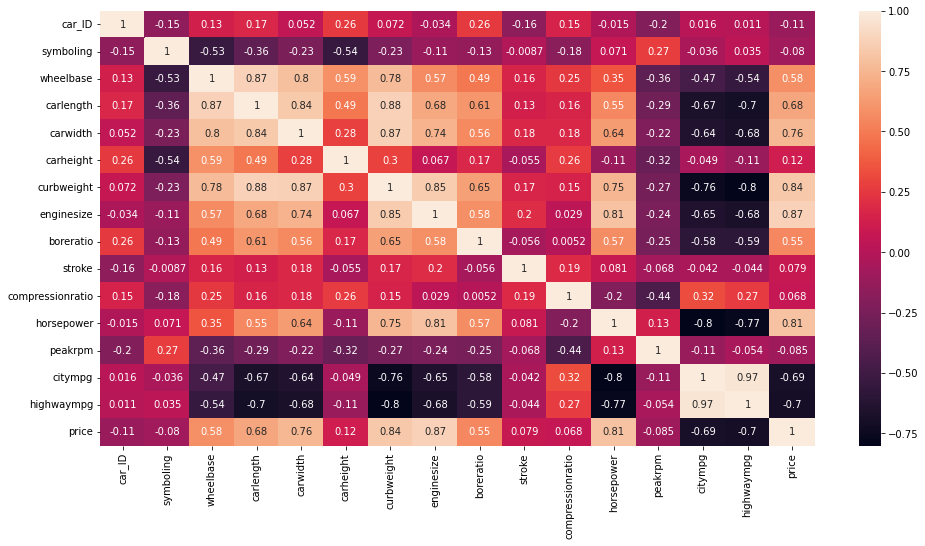

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Vamos a crear una funcion que nos permita conocer ciertas columnas con correlacion

In [ ]:
def correlation(dataframe,threshold):
    cols_corr = set()
    corr_matrix = dataframe.corr()
    for i in range(len(corr_matrix.columns)):
      for j in range(i):
        if abs(corr_matrix.iloc[i,j]) >= threshold:
          col_name = corr_matrix.columns[i]
          cols_corr.add(col_name)
    return cols_corr

In [ ]:
corr_cols = correlation(df.iloc[:,:-1],0.70) # Nos devuelve las columnas que tienen una correlación mayor a 0.70
corr_cols

{'carlength',
 'carwidth',
 'citympg',
 'curbweight',
 'enginesize',
 'highwaympg',
 'horsepower'}

## Correlacion con respecto al precio 

In [ ]:
def correlation2(dataframe,nombre,threshold):
  cols_correl=set()
  corr_matrix=dataframe.corr()
  for i in corr_matrix:
    if corr_matrix[i][nombre]>=threshold and corr_matrix[i][nombre]!=1:
      cols_correl.add(i)

  return cols_correl

In [ ]:
corr_cols=correlation2(df.iloc[:,:],"price",0.70)
corr_cols

{'carwidth', 'curbweight', 'enginesize', 'horsepower'}

## Ahora separemos las columnas categoricas de las numericas

In [ ]:
def categorical(dataframe):
  categorical_col=[]
  for col in dataframe:
    if df[col].dtype=="object":
      categorical_col.append(col)
  return categorical_col

In [ ]:
cat_col=categorical(df)
print(cat_col)

['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


## Vamos a obtener las columnas numericas

In [ ]:
def numerical(dataframe):
  numerical_col=[]
  for col in dataframe:
    if df[col].dtype!="object":
      numerical_col.append(col)
  return numerical_col

In [ ]:
numerical_col=numerical(df)
print(numerical_col)

['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


## Grafiquemos las columnas categoricas

In [ ]:
# Quitamos la columna CarName ya que no nos es muy útil
cat_col.remove("CarName")
cat_col

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

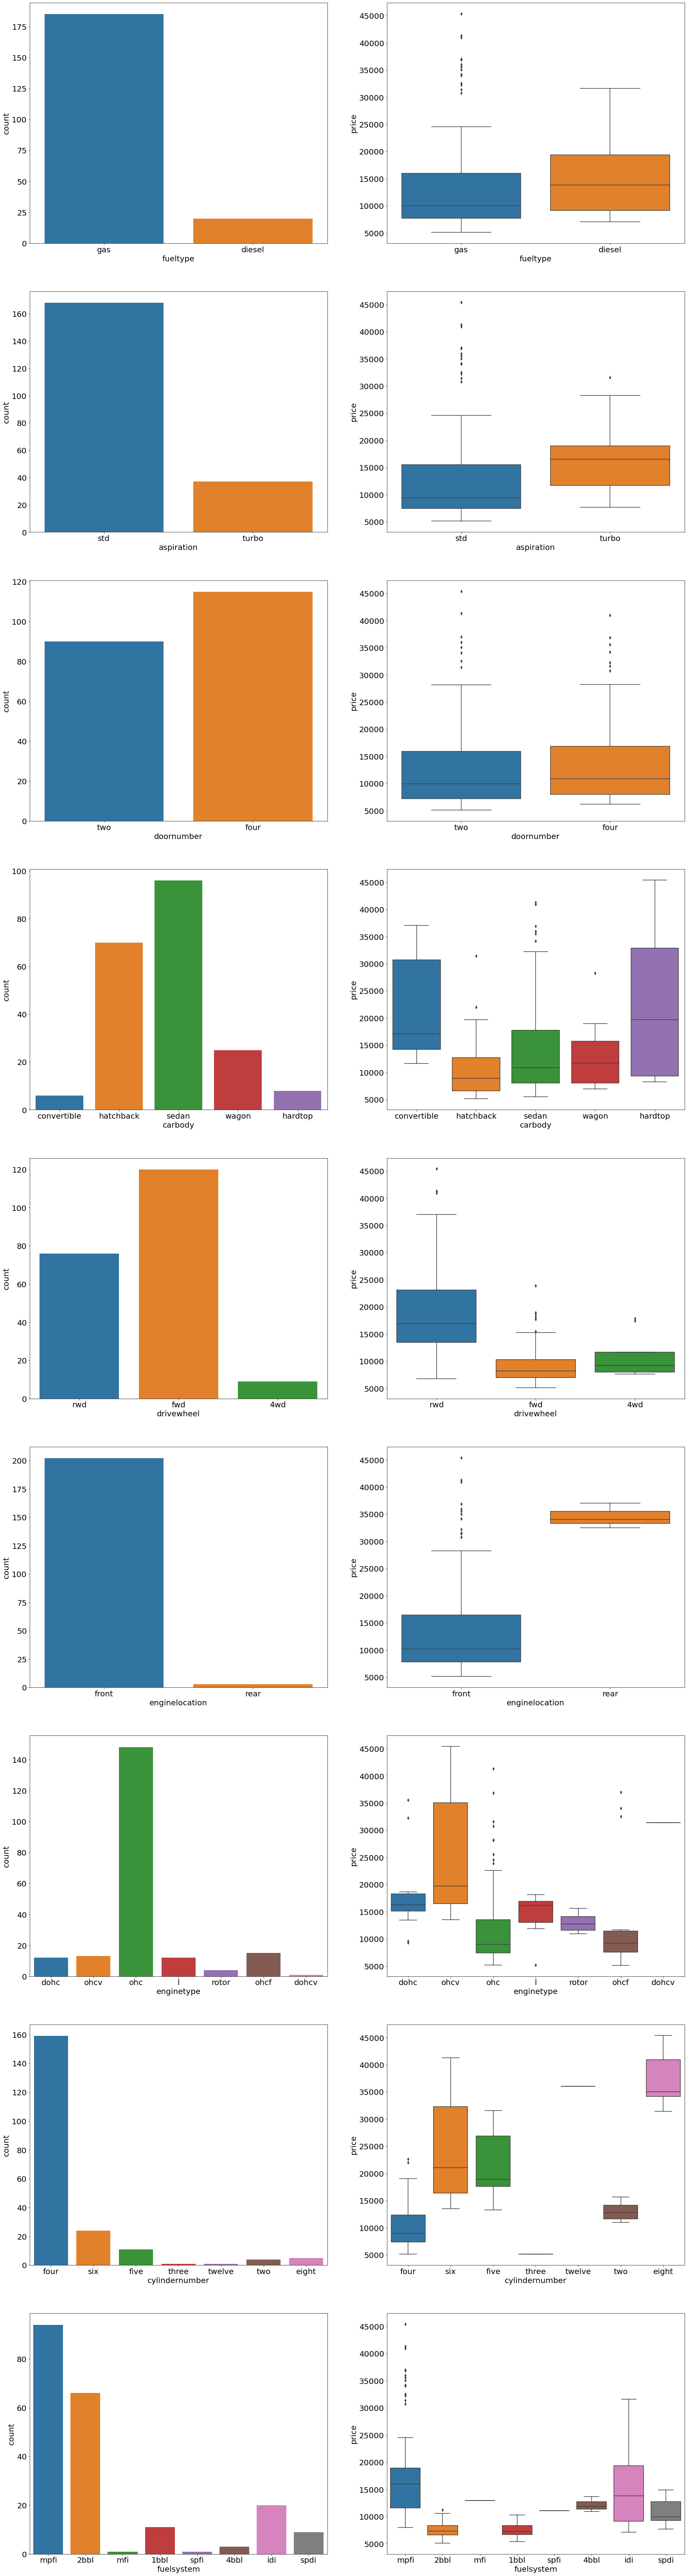

In [ ]:
i=1
plt.figure(figsize=(30,120))
for col in cat_col:
  #countplot
  plt.subplot(len(cat_col),2,i)
  sns.countplot(df[col])
  plt.yticks(fontsize=20)
  plt.xticks(fontsize=20)
  plt.xlabel(col,fontsize=20)
  plt.ylabel("count",fontsize=20)
  i=i+1
  
  #boxplot
  plt.subplot(len(cat_col),2,i)
  sns.boxplot(x=df[col],y=df["price"])
  plt.yticks(fontsize=20)
  plt.xticks(fontsize=20)
  plt.xlabel(col,fontsize=20)
  plt.ylabel("price",fontsize=20)
  i=i+1

plt.show()
  

## Grafiquemos las columnas numericas

In [ ]:
# Quitamos la columna price que es la dependiente y la columna car_ID ya que no nos es muy útil
numerical_col.remove("car_ID")
numerical_col.remove("price")
numerical_col

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

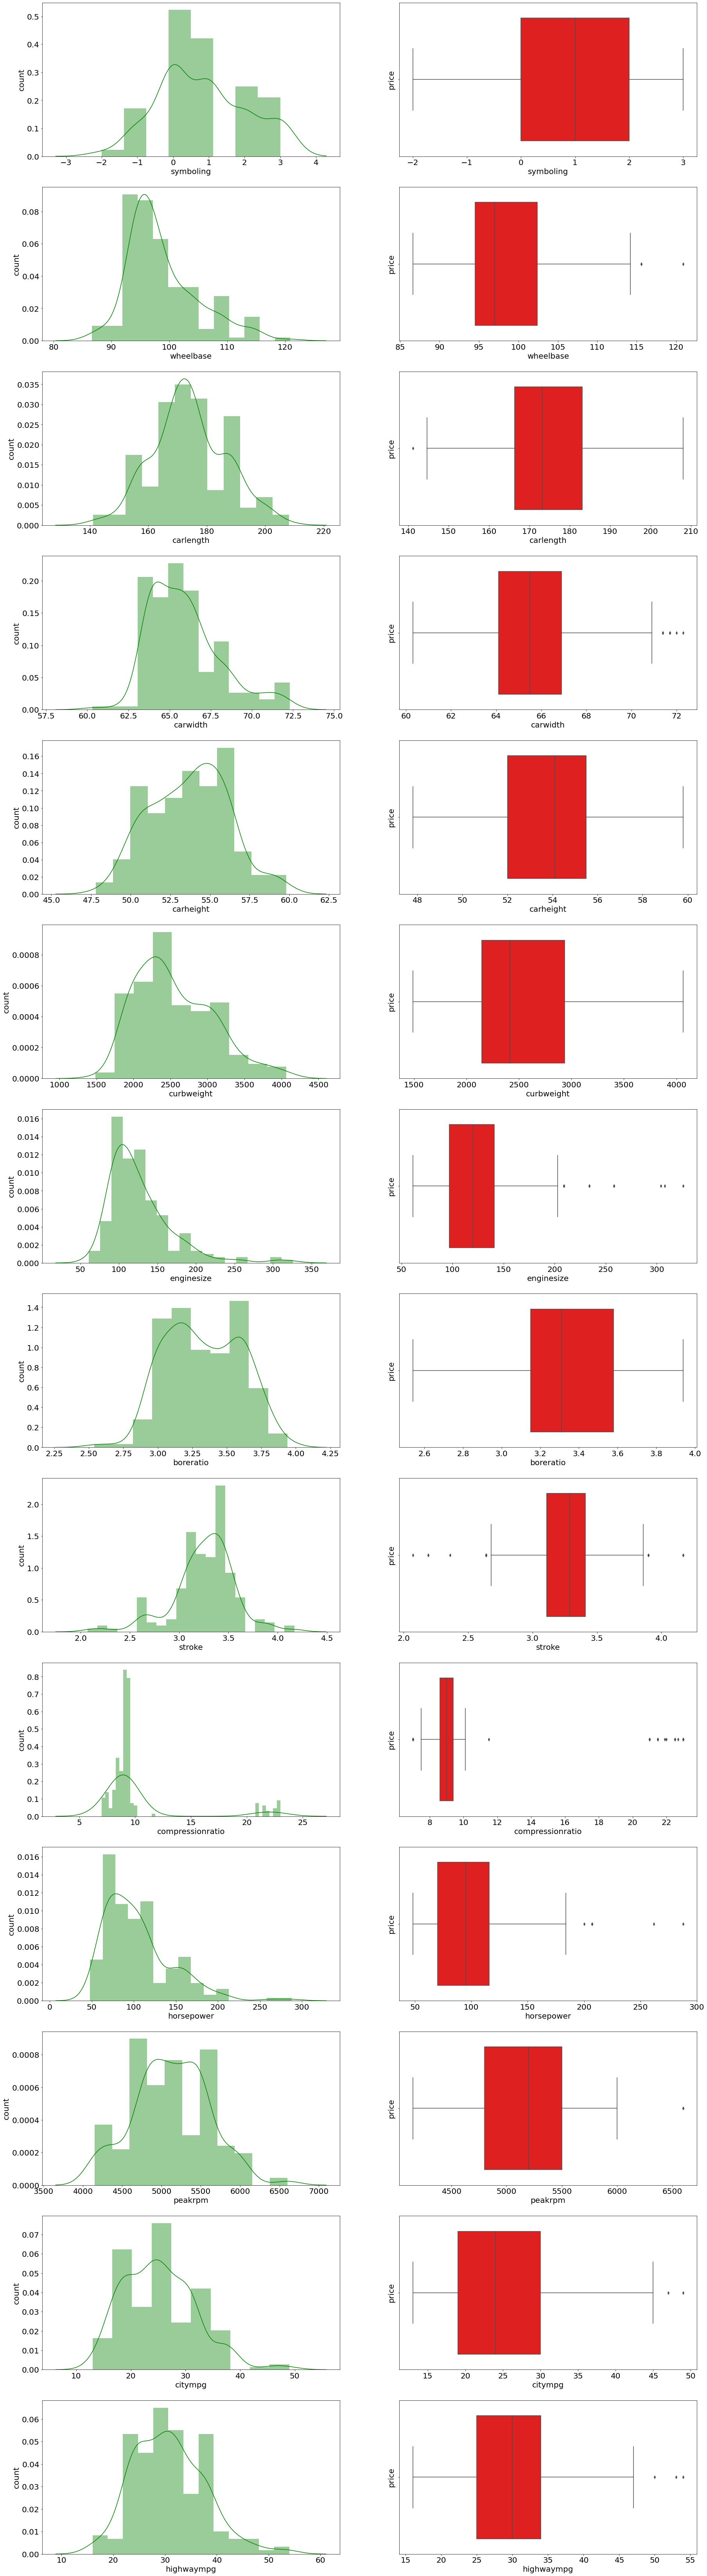

In [ ]:
i=1
plt.figure(figsize=(30,120))
for col in numerical_col:
  #countplot
  plt.subplot(len(numerical_col),2,i)
  sns.distplot(df[col],color="green")
  plt.yticks(fontsize=20)
  plt.xticks(fontsize=20)
  plt.xlabel(col,fontsize=20)
  plt.ylabel("count",fontsize=20)
  i=i+1
  
  #boxplot
  plt.subplot(len(numerical_col),2,i)
  sns.boxplot(df[col],color="red")
  plt.yticks(fontsize=20)
  plt.xticks(fontsize=20)
  plt.xlabel(col,fontsize=20)
  plt.ylabel("price",fontsize=20)
  i=i+1

plt.show()

# Price y Curbweight

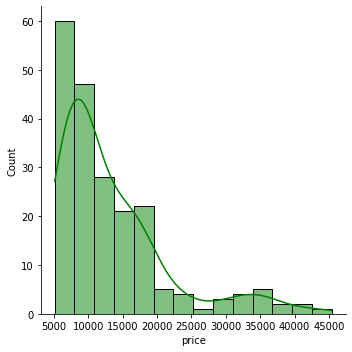

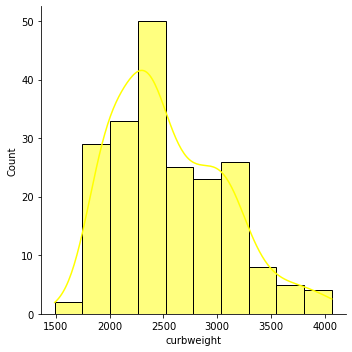

In [ ]:
sns.displot(df['price'],color="green",kde=True) # Obervamos la grafica de distribucion del precio con rangos de valores muy disparejos
sns.displot(df['curbweight'],color="yellow",kde=True) # Obervamos la grafica de distribucion del peso carro con rangos de valores muy disparejos

In [ ]:
df['price'].skew() # Obtener sesgo con respecto a la media 

1.7776781560914454

In [ ]:
df['curbweight'].skew() # Obtener sesgo con respecto a la media 

0.681398189052588

## Guardamos los datos normalizados en un dataframe temporal

In [ ]:
dftemporal = pd.read_csv("car_price_assignment.csv")
dftemporal

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Normalizar con **min-max** a Precio y Curbweight


Los valores están muy disparejos y tienen un sesgo grande con respecto a la media, lo cual provoca problemas entre los datos, por eso se hace la normalización con mínimos y máximos que está en el rango de 0 a 1.

In [ ]:
def minmax_norm(dataframe):
  return (dataframe - dataframe.min()) / (dataframe.max() - dataframe.min())

In [ ]:
print(df['price'])

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


* Se cambia la escala de los valores que se están trabajando y posteriormente se grafican ambos valores, los anteriores y los normalizados.

In [ ]:
dftemporal['price'] = minmax_norm(df['price'])
dftemporal

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,0.207959
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,0.282558
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,0.282558
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,0.219254
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,0.306142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,0.291123
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,0.345738
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,0.406311
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,0.430763


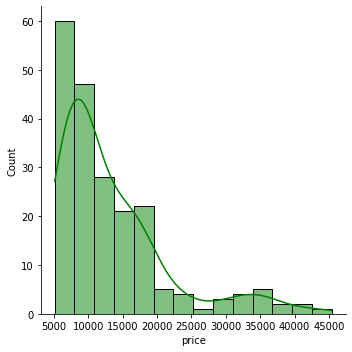

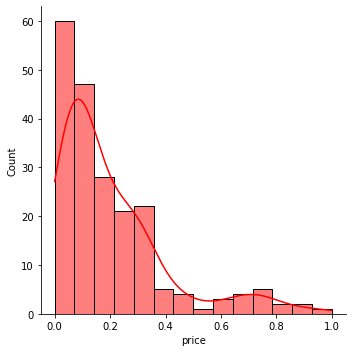

In [ ]:
sns.displot(df['price'],color="green",kde=True) 
sns.displot(dftemporal['price'],color="red", kde=True)

In [ ]:
dftemporal['curbweight'] = minmax_norm(df['curbweight'])
dftemporal

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,0.411171,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,0.207959
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,0.411171,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,0.282558
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,0.517843,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,0.282558
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,0.329325,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,0.219254
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,0.518231,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,0.306142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,0.567882,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,0.291123
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,0.605508,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,0.345738
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,0.591156,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,0.406311
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,0.670675,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,0.430763


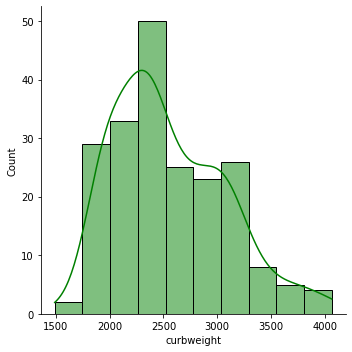

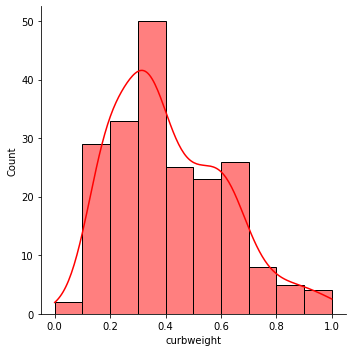

In [ ]:
sns.displot(df['curbweight'],color="green",kde=True) 
sns.displot(dftemporal['curbweight'],color="red", kde=True)

# Transformación log

Se selecciona la librería con la que se va a trabajar  y esta tiene diferentes funciones, las cuales nos permitirán hacer la trasformación de los datos.

In [ ]:
from sklearn.preprocessing import FunctionTransformer
ft=FunctionTransformer(func=np.log1p)

In [ ]:
temporal2=ft.fit_transform(df['price'])

* En esta grafica vuelven a cambian los rangos de valores en price

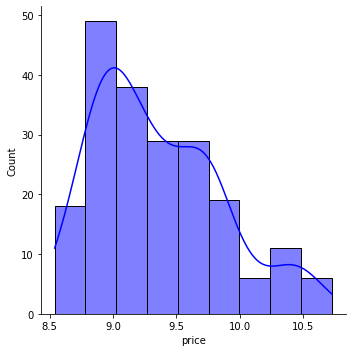

In [ ]:
sns.displot(temporal2,color="blue",kde=True)

In [ ]:
dftemporal2 = pd.read_csv("car_price_assignment.csv")
dftemporal2

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
dftemporal2['price']=ft.fit_transform(df['price'])
dftemporal2

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,9.510149
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,9.711176
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,9.711176
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,9.543306
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,9.767152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,9.731869
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,9.854612
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,9.975157
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,10.019981


## Normalización por desviación estandar


In [ ]:
def df_desvest(dataframe):
  return (dataframe-dataframe.mean())/(dataframe.std())

In [ ]:
temporal2_price=df_desvest(df['price'])
temporal2_price

0      0.027324
1      0.403473
2      0.403473
3      0.084279
4      0.522389
         ...   
200    0.446659
201    0.722042
202    1.027468
203    1.150765
204    1.170167
Name: price, Length: 205, dtype: float64

# Columnas categoricas a numericas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Observamos que no hay datos nulos en ninguna columna
Tambien observamos que las columnas categoricas que tenemos son 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 
'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'

Creamos un pequeño algoritmo para saber de las columnas categoricas cuales podrian ser transformadas a numericas
Normalmente las que pueden ser transformadas son las que solo tienen 2 valores diferentes, para ubicarlas más rapido se realiza el siguiente codigo:


In [ ]:
categoricas = []
for a in df:
  if df[a].dtype == "object":
    categoricas.append(a)

print("Columnas categoricas:" + str(categoricas))
posibilidad = []
for i in categoricas:
  conjunto=set()
  for o in df[i]:
    conjunto.add(o)
  if(len(conjunto) >=2 and len(conjunto) <=3):
    posibilidad.append(i)

print("Columnas posibles:" + str(posibilidad))

Columnas categoricas:['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
Columnas posibles:['fueltype', 'aspiration', 'doornumber', 'drivewheel', 'enginelocation']


Si analizamos el dataframe, de todas las columnas categoricas las unicas que podemos convertir a numerico son las antes mencionadas, las cuales de alguna manera influyen en el costo del automovil.

# Aplicamos la transformación usando dummies y guardamos en dataframe temporal

In [ ]:
dftemporalnormalizado = pd.get_dummies(dftemporal, columns = posibilidad, drop_first = False)

In [ ]:
dftemporalnormalizado

,car_ID,symboling,CarName,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear
0,1,3,alfa-romero giulia,convertible,88.6,168.8,64.1,48.8,0.411171,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,0.207959,0,1,1,0,0,1,0,0,1,1,0
1,2,3,alfa-romero stelvio,convertible,88.6,168.8,64.1,48.8,0.411171,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,0.282558,0,1,1,0,0,1,0,0,1,1,0
2,3,1,alfa-romero Quadrifoglio,hatchback,94.5,171.2,65.5,52.4,0.517843,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,0.282558,0,1,1,0,0,1,0,0,1,1,0
3,4,2,audi 100 ls,sedan,99.8,176.6,66.2,54.3,0.329325,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,0.219254,0,1,1,0,1,0,0,1,0,1,0
4,5,2,audi 100ls,sedan,99.4,176.6,66.4,54.3,0.518231,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,0.306142,0,1,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),sedan,109.1,188.8,68.9,55.5,0.567882,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,0.291123,0,1,1,0,1,0,0,0,1,1,0
201,202,-1,volvo 144ea,sedan,109.1,188.8,68.8,55.5,0.605508,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,0.345738,0,1,0,1,1,0,0,0,1,1,0
202,203,-1,volvo 244dl,sedan,109.1,188.8,68.9,55.5,0.591156,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,0.406311,0,1,1,0,1,0,0,0,1,1,0
203,204,-1,volvo 246,sedan,109.1,188.8,68.9,55.5,0.670675,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,0.430763,1,0,0,1,1,0,0,0,1,1,0


## Si analizamos ahora el resultado todas las columnas son numericas

In [ ]:
(pd.get_dummies(dftemporal, columns=posibilidad, drop_first = False)).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_ID                205 non-null    int64  
 1   symboling             205 non-null    int64  
 2   CarName               205 non-null    object 
 3   carbody               205 non-null    object 
 4   wheelbase             205 non-null    float64
 5   carlength             205 non-null    float64
 6   carwidth              205 non-null    float64
 7   carheight             205 non-null    float64
 8   curbweight            205 non-null    float64
 9   enginetype            205 non-null    object 
 10  cylindernumber        205 non-null    object 
 11  enginesize            205 non-null    int64  
 12  fuelsystem            205 non-null    object 
 13  boreratio             205 non-null    float64
 14  stroke                205 non-null    float64
 15  compressionratio      2

# Regresión Lineal

## Importar librerias

In [ ]:
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split # Dividir los datos en entrenamiento (train) 70% y en prubea (test) 30%.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import time as time
from joblib import dump,load

## Dataset

In [ ]:
df_x = dftemporalnormalizado[['carwidth', 'curbweight', 'enginesize', 'horsepower']]
df_y = dftemporalnormalizado[['price']]

## Revisar datos

In [ ]:
df_x

,carwidth,curbweight,enginesize,horsepower
0,64.1,0.411171,130,111
1,64.1,0.411171,130,111
2,65.5,0.517843,152,154
3,66.2,0.329325,109,102
4,66.4,0.518231,136,115
...,...,...,...,...
200,68.9,0.567882,141,114
201,68.8,0.605508,141,160
202,68.9,0.591156,173,134
203,68.9,0.670675,145,106


In [ ]:
df_y

,price
0,0.207959
1,0.282558
2,0.282558
3,0.219254
4,0.306142
...,...
200,0.291123
201,0.345738
202,0.406311
203,0.430763


## Graficar datos

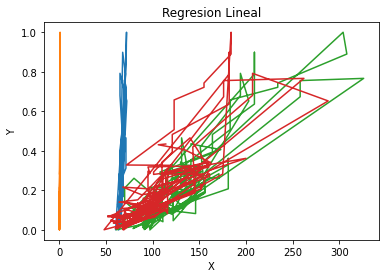

In [ ]:
plt.plot(df_x, df_y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Regresion Lineal")
plt.savefig("rl.png") # Guardar gráfica como archivo png
plt.show()

## Separar dataset en train y test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, train_size=0.7, random_state=1234)

## Verificar x_train

In [ ]:
x_train

,carwidth,curbweight,enginesize,horsepower
144,65.4,0.347944,108,82
197,67.2,0.602793,141,114
27,63.8,0.272692,98,102
99,65.2,0.324282,120,97
129,72.3,0.728472,203,288
...,...,...,...,...
152,63.6,0.204422,92,62
116,68.4,0.684251,152,95
53,64.2,0.177269,91,68
38,65.2,0.310706,110,86


## Entrenar el modelo de ML 

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Guardar el modelo

In [ ]:
dump(model,"regresion00.joblib")

['regresion00.joblib']

## Calcular la precisión

In [ ]:
y_hat = model.predict(x_test)  # Evalua presicion de las predicciones
acc = r2_score(y_test,y_hat) # Calculo presicion con r2
print("Accuracy: %.2f" % acc) # Formateo datos para dos decimales

Accuracy: 0.81


# Predicciones

In [ ]:
print(y_test)
predictions = model.predict(x_test)
print(predictions)

        price
5    0.251527
66   0.328335
6    0.312596
174  0.138523
54   0.056526
..        ...
108  0.200636
136  0.323519
122  0.061839
188  0.121071
77   0.026588

[62 rows x 1 columns]
[[ 0.22754906]
 [ 0.19689817]
 [ 0.3031074 ]
 [ 0.13378741]
 [ 0.02098705]
 [ 0.25132225]
 [ 0.1668592 ]
 [ 0.25209821]
 [ 0.33670479]
 [ 0.34070982]
 [ 0.03783407]
 [ 0.18021126]
 [ 0.3135983 ]
 [ 0.46398524]
 [ 0.05499577]
 [ 0.01429907]
 [ 0.33547421]
 [ 0.14145337]
 [ 0.10316944]
 [ 0.11326904]
 [ 0.26060988]
 [ 0.05508345]
 [ 0.20546242]
 [ 0.11120922]
 [ 0.01703482]
 [ 0.08780057]
 [ 0.42089225]
 [ 0.16064815]
 [ 0.28969533]
 [ 0.44615784]
 [ 0.16032099]
 [ 0.15264476]
 [ 0.10430355]
 [ 0.39726027]
 [ 0.2903301 ]
 [ 0.03745258]
 [ 0.08706223]
 [ 0.39190993]
 [ 0.21915228]
 [ 0.41060417]
 [ 0.44006199]
 [ 0.03869242]
 [ 0.33433022]
 [ 0.01621846]
 [ 0.14330333]
 [ 0.80267366]
 [-0.02398224]
 [ 0.71710025]
 [ 0.43967256]
 [ 0.0292506 ]
 [ 0.12080428]
 [ 0.0193563 ]
 [ 0.03652691]
 [ 0.34501187]

# Cargar el modelo

## Metodo para revertir la normalización del precio 

In [ ]:
def minmax_norm_inverso(valorNormalizado, dataframe):
    uno = valorNormalizado * (dataframe.max() - dataframe.min())
    desnormalizado = uno + dataframe.min()
    return desnormalizado

In [ ]:
import sklearn
import pandas as pd
from joblib import load


model = load("regresion00.joblib")
x_test
df1= pd.DataFrame(
{"carwidth" : [65.5],
"curbweight" : [0.517843],
"enginesize" : [152],
"horsepower" : [154]})
df1
resultado = model.predict(df1)
resultado = resultado[0][0]
print('El precio del automovil normalizado es: ' + str (resultado))
resultadoreal = minmax_norm_inverso(resultado, df['price'])
print('El precio del automovil es: ' + str (resultadoreal))

El precio del automovil normalizado es: 0.3323226261439386
El precio del automovil es: 18504.620026330136


# Conclusión

Hoy en dia la necesidad de predecir valores cuando realizamos analisis de datos es muy alta en cualquier empresa. En esta ocasión se presentó una situación muy interesante, donde se tenian 205 registros de diferentes automoviles en donde aparecian las caracteristicas de cada uno de ellos.

A cada uno de los datos se le realizó una normalización para que no existiese mucha diferencia en el rango de los datos ordenados. Tambien se hizo la transformación de las columnas categoricas a numericas. Al tener todos los datos listos, se hizo un analisis de correlación el cual nos indico que las columnas con mayor correlacion que se tienen eran carwidth, curbweight,enginesize y horsepower, las mismas que fueron usadas para realizar el entrenamiento del modelo puesto que tenian un valor igual o mayor al 70 % de correlación.

Asi que entonces, el valor que nos dio de aceptacion fue del 81% por lo que aun se presentan ligeros casos de error, pero los valores predecidos son muy cercanos al original.